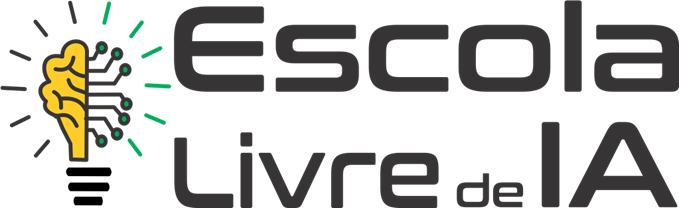
###    prof: Wagner Santos

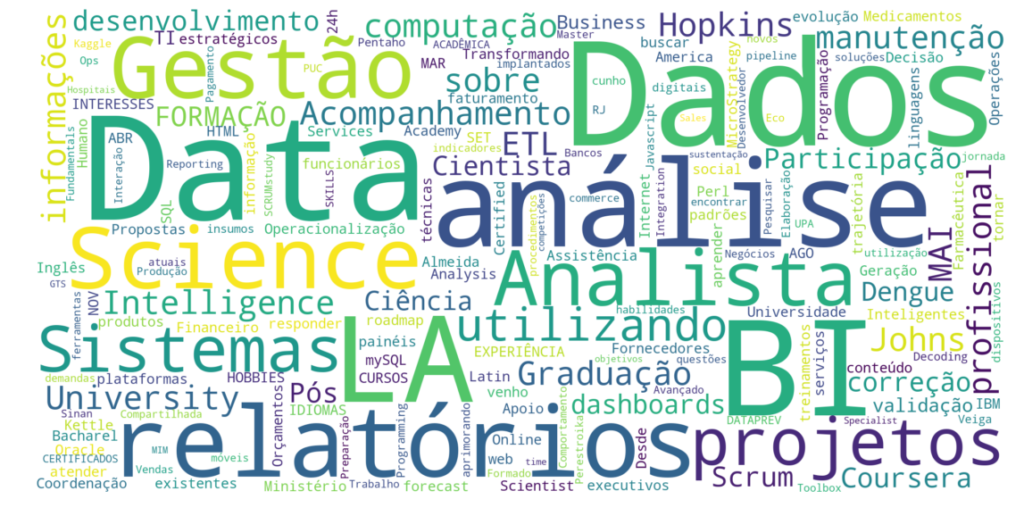

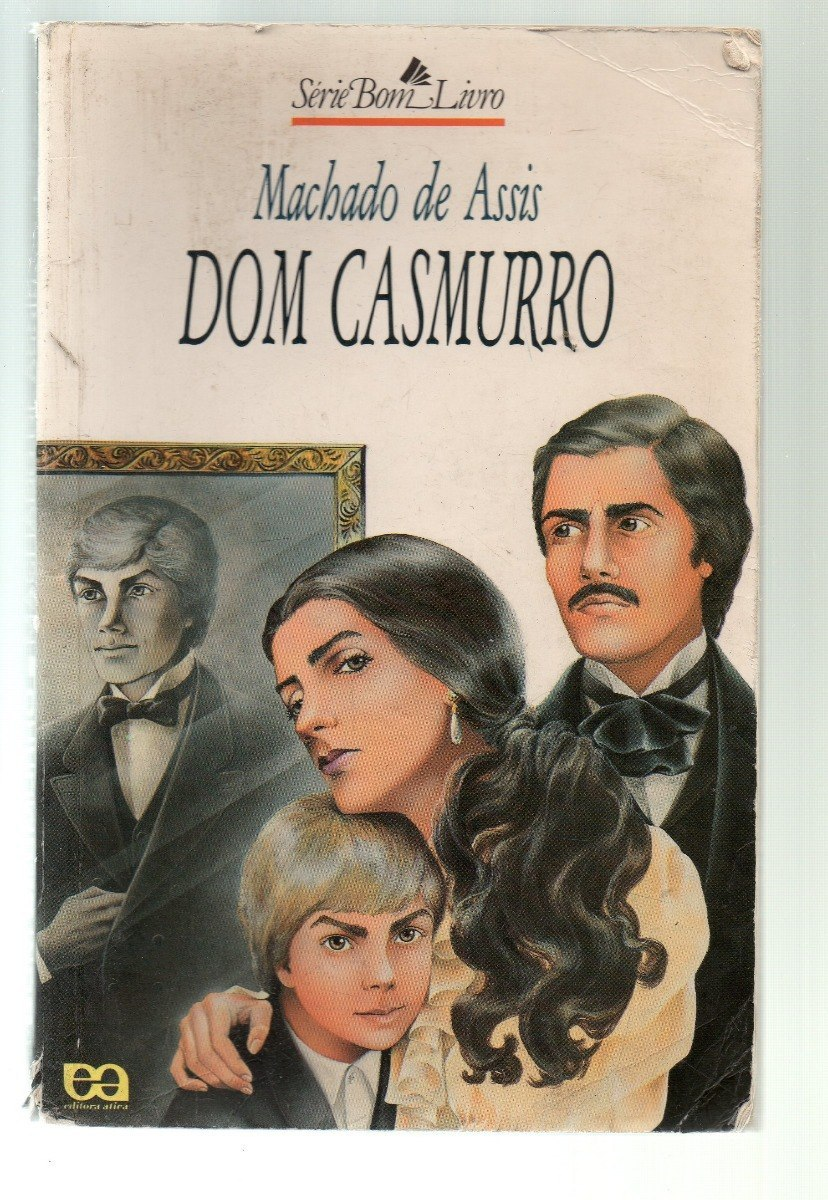

### Necessário instalar as seguintes bilbiotecas:
- nltk
- wordcloud

In [ ]:
!pip install nltk
!pip install wordcloud

## Recupera as informações das obras de Machado de Assis que já estão na biblioteca NLTK

In [ ]:
import nltk
from nltk.corpus import machado
nltk.download('machado')
nltk.corpus.machado.fileids()

In [ ]:
# Apresenta na tela todas as obras presentes
print(nltk.corpus.machado.readme())

In [ ]:
textoDomCasumurro = machado.raw('romance/marm08.txt')
textoDomCasumurro

## Importa bibliotecas para a geração da Wordcloud

In [ ]:
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Geração da Wordcloud - função

In [ ]:
# Função que gera uma WordCloud!
def geraWordCloud(string_palavras):
    nuvem_palavras = WordCloud(width= 800, height= 500,
                                max_font_size = 110,
                                collocations = False).generate(string_palavras)
    # Plot da nuvem de palavras através do MatPlotLib
    plt.figure(figsize=(24,12))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
geraWordCloud(textoDomCasumurro)

In [ ]:
import pandas as pd
from nltk import tokenize, FreqDist
# transforma a string que contém todas as palavras em uma Lista de palavras
def tokeniza(string_palavras):
    token_espaco = tokenize.WhitespaceTokenizer()
    token = token_espaco.tokenize(string_palavras)
    return token

In [ ]:
# tokenização do texto - coloca palavras em uma lista
token_tdc = tokeniza(textoDomCasumurro)

print(len(token_tdc))
print(token_tdc[:10])

In [ ]:
# Função que calcula a frequência das palavras
def calculaFreqToken(token):
    frequencia = nltk.FreqDist(token)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    # Mostra as 5 Palavras mais comuns do dataset
    df_frequencia.sort_values(by='Frequência', inplace=True, ascending=False)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia.head(15), x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()
    return df_frequencia.head()  

In [ ]:
calculaFreqToken(token_tdc)

## Precisamos fazer a limpeza das 'Stop Words' -> palavras de conexão

In [ ]:
def limpaToken(token):
    # inicializa contadores
    tokenLimpo = []
    contador = 0
    # verifica se existe da lista de stop words para eliminar as palavras desnecessárias
    for palavra in token:
        if palavra.lower() not in stop_words:
            tokenLimpo.append(palavra)
        else:
            contador += 1
    print("palavras eliminadas: ", contador)
    return tokenLimpo

In [ ]:
stop_words = nltk.corpus.stopwords.words("portuguese")
stop_words.append('\x97')
stop_words.append('capítulo')
stop_words.append('CAPÍTULO')
# chama a limpeza para a Lista com as palavras
token_tdc = limpaToken(token_tdc)

print('palavras restantes: ',len(token_tdc))
print(token_tdc[:10])

In [ ]:
calculaFreqToken(token_tdc)

In [ ]:
textoLimpo = ' '.join(token_tdc)
geraWordCloud(textoLimpo)

# Exemplo Reconhecimento e Geração de Fala (Speech)
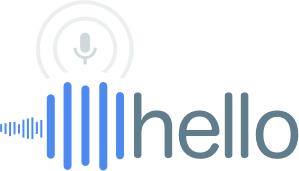

### Necessário instalar as seguintes bilbiotecas:
- SpeechRecognition
- playsound
- gtts

In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install playsound

In [ ]:
!pip install gTTS

In [ ]:
# Import bibliotecas
import speech_recognition as spr
from playsound import playsound

## Inicialização do objeto para transformar som em texto

In [ ]:
recog = spr.Recognizer()

## Captura do áudio através do microfone da máquina

In [ ]:
# inicialização do objeto que faz a leitura do mic
mc = spr.Microphone()

In [ ]:
# verifica dispositivos presentes na máquina
mc.list_microphone_names()

In [ ]:
# escolhe qual dispositivo será utilizado (pegamos o primeiro - 0)
mc = spr.Microphone(device_index=0)

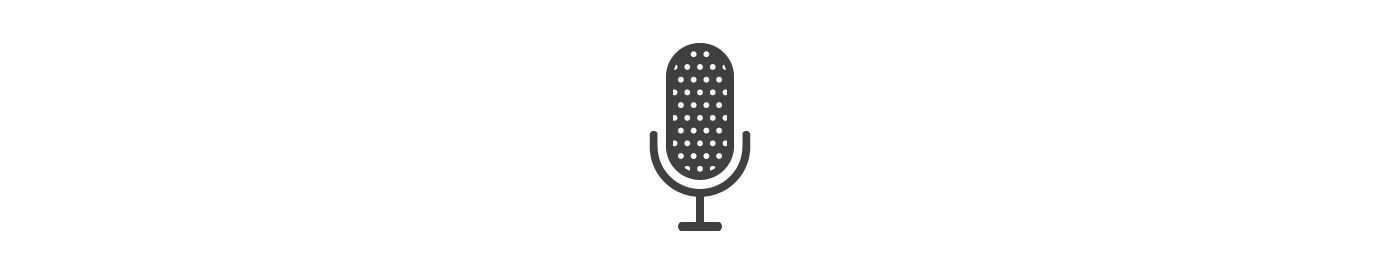

In [ ]:
# Gravação do Áudio com o microfone
with mc as source:
    audio = recog.listen(source)

In [ ]:
# grava arquivo com o áudio
with open('gravMicAudio1.wav', "wb") as f:
    f.write(audio.get_wav_data())

In [ ]:
# reproduz o áudio gravado
playsound('gravMicAudio1.wav')

In [ ]:
# transcrição do áudio gravado
gravMic = recog.recognize_google(audio,language='pt-BR')
print(gravMic)

## Geração de Fala (Speech) do texto gravado

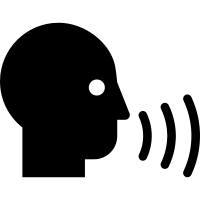

In [ ]:
# gravação do áudio com o texto capturado
from gtts import gTTS
tts = gTTS(text=gravMic, lang='pt')
tts.save("speechComputer.mp3")

In [ ]:
# reprodução do áudio
playsound('speechComputer.mp3')

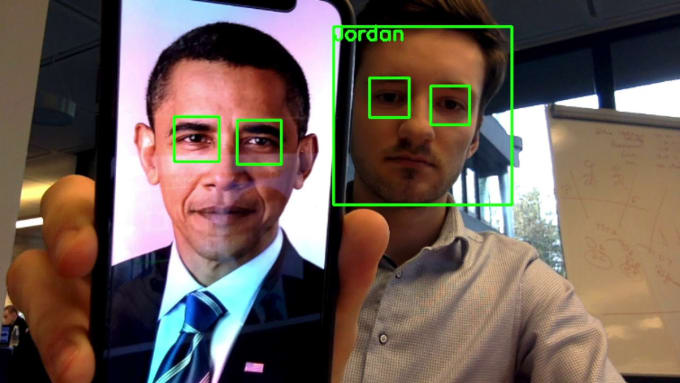

# Exemplo Visão Computacional

## Necessário instalar as seguintes bilbiotecas:
- opencv (cv2)

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import cv2
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

## Detecta Faces

In [ ]:
# inicializa a Webcam
cap = cv2.VideoCapture(0)

while 1:
    # Lê a imagem da cam
    ret, img = cap.read()
    # converte para tons de cinza para facilitar a detecção
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detecta as faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        # desenha o retângulo
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        # seleciona a imagem em tons de cinza
        roi_gray = gray[y:y+h, x:x+w]
        # seleciona a imagem em cores
  
    # apresenta a imagem
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
# fecha a janela quando recebe a tela 'ESC'
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Detecta Faces e Olhos

In [ ]:
# inicialia a Webcam
cap = cv2.VideoCapture(0)

while 1:
    # Lê a imagem da cam
    ret, img = cap.read()
    # converte para tons de cinza para facilitar a detecção
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detecta as faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        # desenha o retângulo
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        # seleciona a imagem em tons de cinza
        roi_gray = gray[y:y+h, x:x+w]
        # seleciona a imagem em cores
        roi_color = img[y:y+h, x:x+w]
            
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    # apresenta a imagem
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
# fecha a janela quando recebe a tela 'ESC'
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Detecta Bordas

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    # Utiliza a técnica 'Canny Edges'
    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()